# Proyek Analisis Data: Bike Sharing Dataset
Nama: [Regina Kembar Duanti]

Email: [reginakd07@student.ub.ac.id]

ID Dicoding: [reginakd07]

# Menentukan Pertanyaan Bisnis
Pertanyaan 1 : Bagaimana cuaca yang berawan, mendung, dan gerimis mempengaruhi performa penyewaan sepeda?

Pertanyaan 2 : Bagaimana performa penyewaan sepeda setiap bulan di tahun 2011 dan 2012?

# Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

# Gathering Data

mengumpulkan data csv, lalu menampilkan head setiap data

In [69]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [70]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assessing Data

menilai data csv dari setiap tabel day dan hour

Assessing Data of Day Table

menampilkan info dari data day, dan menemukan kesalahan data type pada dteday 

In [71]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


mengecek duplikasi data

In [72]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat permasalahan terhadap duplikasi data

In [73]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Assessing Data of Hour Table

menampilkan info dari hour day, dan menemukan kesalahan data type pada dteday

In [76]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


mengecek duplikasi data

In [75]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat permasalahan terhadap duplikasi data

In [10]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Cleaning Data

Cleaning Data of Day Table (data type is wrong)

memperbaiki tipe data dari dteday 

In [77]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

tipe data sudah diperbaiki

In [78]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [79]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Cleaning Data of Hour Table (data type is wrong)

memperbaiki tipe data dari dteday

In [80]:
hour_df["dteday"] = pd.to_datetime(day_df["dteday"])

tipe data sudah diperbaiki

In [81]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [82]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis (EDA)

Explore Day_df Data

In [38]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


melihat perbandingan banyaknya casual dan registered user berdasarkan cuaca

In [83]:
day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
weathersit,,
1,446346,1811606
2,169776,827082
3,3895,33974


melihat jumlah casual dan registered user setiap tahun 2011 dan 2012

In [84]:
day_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
yr,,
0,247252,995851
1,372765,1676811


melihat jumlah casual dan registered user setiap bulan

In [85]:
day_df.groupby(by=["mnth"]).agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
mnth,,
1,12042,122891
2,14963,136389
3,44444,184476
4,60802,208292
5,75285,256401
6,73906,272436
7,78157,266791
8,72039,279155
9,70323,275668


Explore Hour_df Data

In [87]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-01 00:00:00,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


melihat banyaknya casual dan registered user setiap hari

In [88]:
hour_df.groupby(by="dteday").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
dteday,,
2011-01-01,3,13
2011-01-02,8,32
2011-01-03,5,27
2011-01-04,3,10
2011-01-05,0,1
...,...,...
2012-12-27,10,66
2012-12-28,8,95
2012-12-29,7,183


# Visualization & Explanatory Analysis

Pertanyaan 1 : Bagaimana cuaca yang berawan, mendung, dan gerimis mempengaruhi performa penyewaan sepeda?

In [89]:
byweather_df = day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum"
})

byweather_df

,casual,registered
weathersit,,
1,446346,1811606
2,169776,827082
3,3895,33974


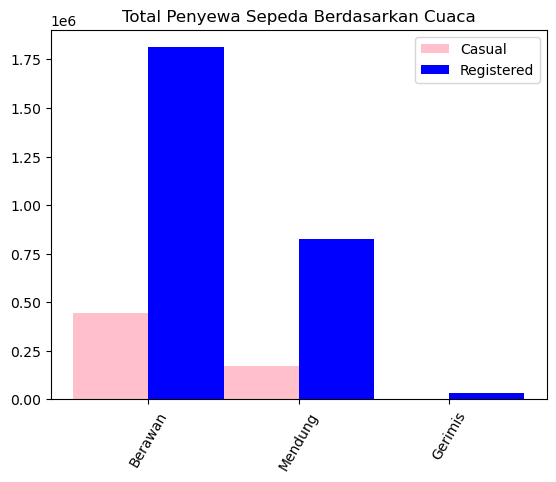

In [90]:
x = np.arange(3)
y1 = byweather_df['casual']
y2 = byweather_df['registered']
width = 0.50

plt.title("Total Penyewa Sepeda Berdasarkan Cuaca", loc="center")
plt.xticks(x, ["Berawan", "Mendung","Gerimis"])
plt.xticks(x, rotation=60)
plt.bar(x-width/2, y1, width, color='pink')
plt.bar(x+width/2, y2, width, color='blue')
plt.legend(["Casual", "Registered"])

Pertanyaan 2 : Bagaimana performa penyewaan sepeda setiap bulan di tahun 2011 dan 2012?

In [91]:
monthly_df = day_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
monthly_df.index = monthly_df.index.strftime('%B')
monthly_df = monthly_df.reset_index()
monthly_df.head(12)

,dteday,casual,registered,cnt
0,January,3073,35116,38189
1,February,6242,41973,48215
2,March,12826,51219,64045
3,April,22346,72524,94870
4,May,31050,104771,135821
5,June,30612,112900,143512
6,July,36452,104889,141341
7,August,28842,107849,136691
8,September,26545,100873,127418
9,October,25222,98289,123511


In [92]:
firstyear_df = monthly_df.head(12)

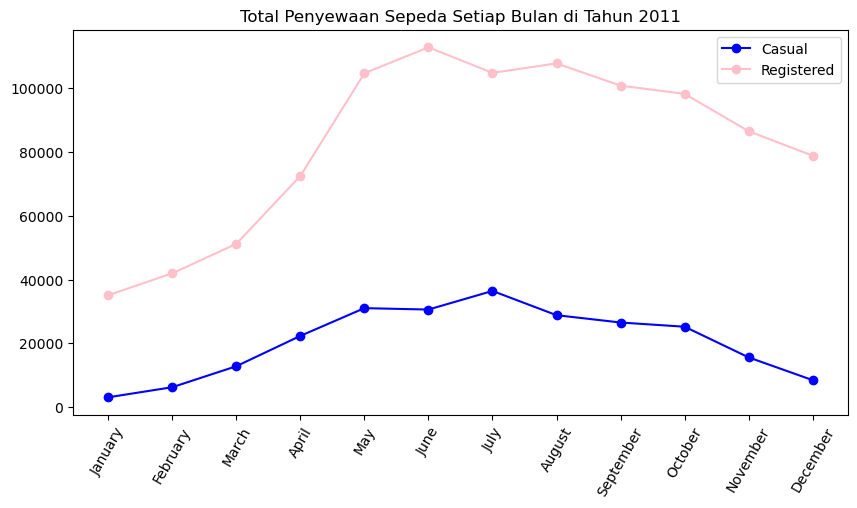

In [93]:
plt.figure(figsize=(10, 5))
x = firstyear_df["dteday"]
y1 = firstyear_df["casual"]
y2 = firstyear_df["registered"]

plt.plot(x, y1, marker='o', color='blue')
plt.plot(x, y2, marker='o', color='pink')
plt.xticks(x, rotation=60)
plt.title("Total Penyewaan Sepeda Setiap Bulan di Tahun 2011", loc="center")
plt.legend(["Casual", "Registered"])
plt.show()

In [94]:
monthly_df = day_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
monthly_df.index = monthly_df.index.strftime('%B')
monthly_df = monthly_df.reset_index()
monthly_df.tail(12)

,dteday,casual,registered,cnt
12,January,8969,87775,96744
13,February,8721,94416,103137
14,March,31618,133257,164875
15,April,38456,135768,174224
16,May,44235,151630,195865
17,June,43294,159536,202830
18,July,41705,161902,203607
19,August,43197,171306,214503
20,September,43778,174795,218573
21,October,34538,164303,198841


In [95]:
secondyear_df = monthly_df.tail(12)

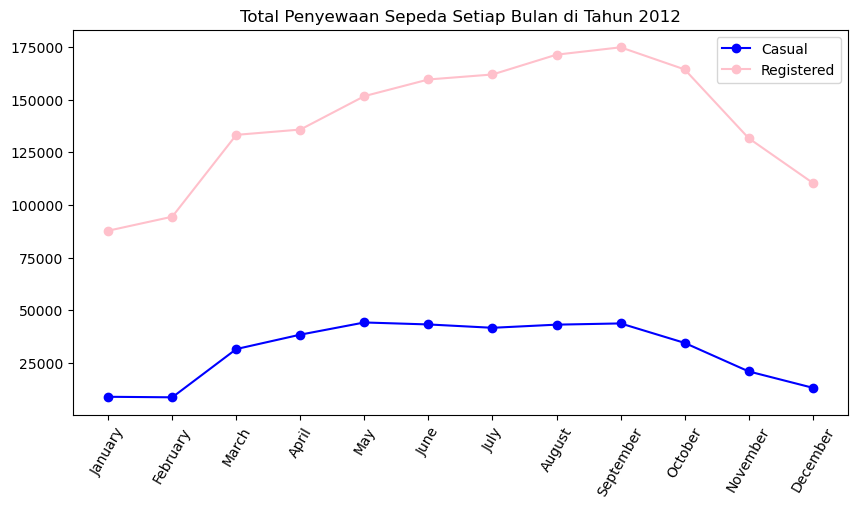

In [96]:
plt.figure(figsize=(10, 5))
x = secondyear_df["dteday"]
y1 = secondyear_df["casual"]
y2 = secondyear_df["registered"]

plt.plot(x, y1, marker='o', color='blue')
plt.plot(x, y2, marker='o', color='pink')
plt.xticks(x, rotation=60)
plt.title("Total Penyewaan Sepeda Setiap Bulan di Tahun 2012", loc="center")
plt.legend(["Casual", "Registered"])
plt.show()

# Conclusion

Conclusion pertanyaan 1 : Sesuai dengan pertanyaannya yaitu cuaca yang berawan, mendung, dan gerimis mempengaruhi performa penyewaan sepeda, grafik visualisasi data menunjukkan hasil yang cukup berbeda diantara casual dan registered user setiap cuaca dimana registered user selalu lebih banyak penyewa sepedanya dibandingkan casual user, dan total penyewa sepeda terbanyak pada saat cuaca berawan, lalu mendung, dan paling sedikit adalah ketika gerimis.

Conclusion pertanyaan 2 : Sesuai dengan pertanyaannya yaitu performa penyewaan sepeda setiap bulan di tahun 2011 dan 2012, grafik visualisasi data menunjukkan hasil yang hampir serupa antara perbedaan penyewa sepeda setiap bulan di tahun 2011 dan 2012 dimana penyewa casual lebih sedikit bertambah dibandingkan penyewa registered setiap bulannya.